In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


         time  acf_data
0    -0.74995  0.017762
1    -0.74980  0.017747
2    -0.74965  0.017741
3    -0.74950  0.017745
4    -0.74935  0.017757
...       ...       ...
9995  0.74935  0.017785
9996  0.74950  0.017788
9997  0.74965  0.017793
9998  0.74980  0.017800
9999  0.74995  0.017809

[10000 rows x 2 columns]
[0.01783759 0.00445356 0.00967402 0.16800694] popt
[5.06526605e-07 1.30972784e-06 3.88040216e-05 6.11699166e-05] std
[[ 2.56569201e-13 -1.81421832e-13 -8.98946781e-20 -1.36879814e-11]
 [-1.81421832e-13  1.71538700e-12 -6.62692686e-19 -3.02358991e-11]
 [-8.98946781e-20 -6.62692686e-19  1.50575209e-09  5.45256938e-17]
 [-1.36879814e-11 -3.02358991e-11  5.45256938e-17  3.74175870e-09]] pcov


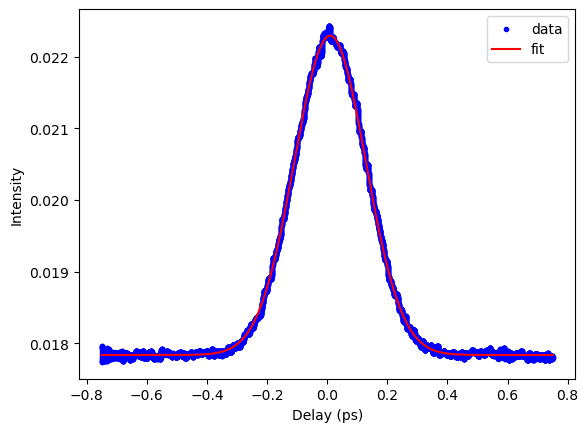

In [16]:
with open('pulseCheck Data 2023-02-24 10-45-52.txt') as f:  #importing and reading file
    for i, line in enumerate(f):
        if line.startswith('# ==='):
            break
    df = pd.read_csv(f, sep='\t', skiprows=2, names=('time', 'acf_data'))
    
def func(t: np.ndarray, a: float, b: float, c: float, d: float) -> np.ndarray:
    return a + b*np.exp(-((t - c)/d)**2)


popt, pcov = curve_fit(func, df.time, df.acf_data, p0=(0, 0.1, 0, 0.1))
perr = np.sqrt(np.diag(pcov))
print(popt, 'popt')
print(perr,'std')
print(pcov,'pcov')

fig, ax = plt.subplots()

ax.scatter(df.time, df.acf_data, label='data', marker='.', color='blue')
ax.plot(df.time, func(df.time, *popt), label='fit', color='r')
ax.set_xlabel('Delay (ps)')
ax.set_ylabel('Intensity')
ax.legend()

plt.show()

